# Human Body Posture Recognition based on inclination

In [1]:
import cv2
import os
import mediapipe as mp
import pandas as pd
import numpy as np
import csv

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-06 20:31:10.473274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose

# Function for detecting and returning human body posture
def detect_human_posture(frame):
    # Converting frame to RGB as MediaPipe requires RGB input
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use MediaPipe Pose to detect human bodies
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Calculate posture based on landmarks
            posture = analyze_posture(results.pose_landmarks.landmark)
        else:
            posture = "No human detected"

    return posture

# Function to analyze body landmarks and determine posture
def analyze_posture(landmarks):
    left_shoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
    left_hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y
    left_knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y

    if left_shoulder_y > left_hip_y:
        if left_shoulder_y > left_knee_y:
            posture = "Bent Over"
        else:
            posture = "Almost Lied Down"
    else:
        if left_shoulder_y < left_hip_y:
            posture = "Standing Straight"
        else:
            posture = "Not Straight"

    return posture

# Function to detect human bodies using the HOG Detector
def detect_human_hog(frame):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    bodies, _ = hog.detectMultiScale(frame, winStride=(8, 8))
    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

# Function to detect human bodies using Haar Cascades
def detect_human_haar(frame):
    body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
    bodies = body_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return frame

# Function to process images in sequence from a folder
def process_images_in_sequence(folder_path, model_choice):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return

    # Create a list to store posture results
    posture_results = []

    # Loop through image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        frame = cv2.imread(image_path)

        if frame is not None:
            if model_choice == '1':
                frame = detect_human_hog(frame)  # HOG Detector
            elif model_choice == '2':
                frame = detect_human_haar(frame)  # Haar Cascades

            posture = detect_human_posture(frame)
            posture_results.append((image_file, posture))

            print(f"Image: {image_file}, Posture: {posture}")
        else:
            print(f"Failed to read image: {image_file}")

    # Save results to a CSV file
    csv_dir = "./Results"  # Specify the directory to save the CSV files
    if not os.path.exists(csv_dir):
        os.makedirs(csv_dir)

    save_to_csv(model_choice, posture_results, csv_dir)

# Function to save posture results to a CSV file
def save_to_csv(model_choice, posture_results, csv_dir):
    # Create a CSV file for the model choice
    csv_file = os.path.join(csv_dir, f"body_posture_model_{model_choice}.csv")

    # Write results to the CSV file
    with open(csv_file, 'w') as file:
        file.write("Image, Posture\n")
        for image, posture in posture_results:
            file.write(f"{image}, {posture}\n")

if __name__ == "__main__":
    # for Selecting the recognition model
    print("Select the recognition model:")
    print("1. HOG Detector")
    print("2. HAAR Cascades")

    model_choice = input("Enter your choice (1/2): \n")

    if model_choice not in ['1', '2']:
        print("Invalid choice. Please select 1 or 2 for the model.")
    else:
        # for Selecting the source (camera, dataset)
        print("Choose an option:")
        print("Option-1: Live Camera")
        print("Option-2: Input Dataset")

        option = input("Enter your choice (1/2): \n ")

        if option == '1':
            # You can add code for processing live camera feed here if needed
            pass
        elif option == '2':
            folder_path = "./Data"  # Provide the path to your image data folder
            process_images_in_sequence(folder_path, model_choice)
        else:
            print("Invalid choice. Please select either Option-1 or Option-2.")


Select the recognition model:
1. HOG Detector
2. HAAR Cascades


Enter your choice (1/2): 
 1


Choose an option:
Option-1: Live Camera
Option-2: Input Dataset


Enter your choice (1/2): 
  2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Image: pose369.jpg, Posture: Standing Straight
Image: pose433.jpg, Posture: Standing Straight
Image: pose355.jpg, Posture: Standing Straight
Image: pose341.jpg, Posture: Standing Straight
Image: pose88.jpg, Posture: Bent Over
Image: pose427.jpg, Posture: Standing Straight
Image: pose63.jpg, Posture: Standing Straight
Image: pose77.jpg, Posture: Almost Lied Down
Image: pose396.jpg, Posture: Bent Over
Image: pose382.jpg, Posture: Standing Straight
Image: pose619.jpg, Posture: Standing Straight
Image: pose157.jpg, Posture: Standing Straight
Image: pose631.jpg, Posture: Standing Straight
Image: pose625.jpg, Posture: Standing Straight
Image: pose143.jpg, Posture: Standing Straight
Image: pose1161.jpg, Posture: Bent Over
Image: pose816.jpg, Posture: Standing Straight
Image: pose1175.jpg, Posture: Standing Straight
Image: pose802.jpg, Posture: Standing Straight
Image: pose194.jpg, Posture: Standing Straight
Image: pose1149.jpg, Posture: Bent Over
Image: pose180.jpg, Posture: Standing Straight

Test Accuracy: 99.53%


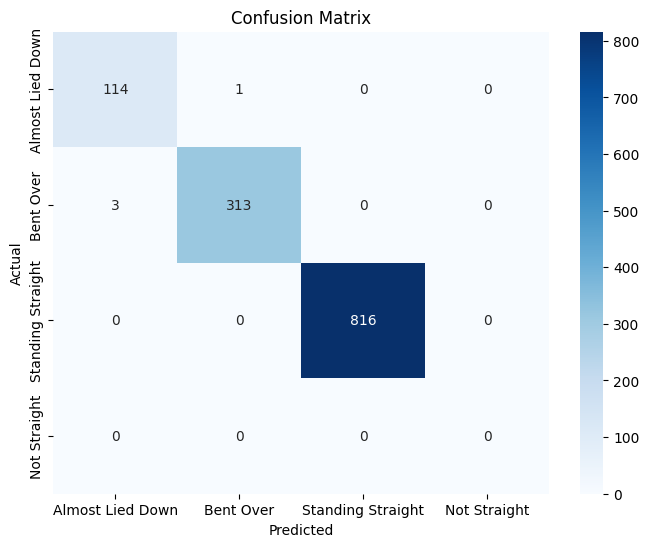

In [6]:

# Function for loading test data from CSV
def load_test_data_from_csv(csv_file, folder_path):
    df = pd.read_csv(csv_file)
    test_images = []
    test_labels = df['Posture'].tolist()
    image_names = df['Image'].tolist()

    for image_name in image_names:
        image_path = os.path.join(folder_path, image_name)
        frame = cv2.imread(image_path)
        test_images.append(frame)

    return test_images, test_labels

if __name__ == "__main__":
    folder_path = "./Data"  
    output_csv = "body_status_2.csv"  

    # Loading test data from the CSV file
    test_images, test_labels = load_test_data_from_csv(output_csv, folder_path)

    # Detecting and evaluating posture
    predicted_labels = [detect_human_posture(image) for image in test_images]

    # Define the possible postures
    possible_postures = ["Almost Lied Down", "Bent Over", "Standing Straight", "Not Straight"]

    # Calculating test accuracy
    accuracy = accuracy_score(test_labels, predicted_labels)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Creating a confusion matrix
    cm = confusion_matrix(test_labels, predicted_labels, labels=possible_postures)

    # Creating a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=possible_postures, yticklabels=possible_postures)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


Epoch 1/10
25/25 [==============================] - 7s 171ms/step - loss: 0.7207 - accuracy: 0.5288 - val_loss: 0.7190 - val_accuracy: 0.4650
Epoch 2/10
25/25 [==============================] - 4s 180ms/step - loss: 0.6978 - accuracy: 0.5100 - val_loss: 0.6947 - val_accuracy: 0.4650
Epoch 3/10
25/25 [==============================] - 3s 137ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6935 - val_accuracy: 0.4650
Epoch 4/10
25/25 [==============================] - 4s 160ms/step - loss: 0.6933 - accuracy: 0.5200 - val_loss: 0.6944 - val_accuracy: 0.4650
Epoch 5/10
25/25 [==============================] - 4s 146ms/step - loss: 0.6908 - accuracy: 0.5587 - val_loss: 0.6914 - val_accuracy: 0.5350
Epoch 6/10
25/25 [==============================] - 3s 136ms/step - loss: 0.6910 - accuracy: 0.5138 - val_loss: 0.6948 - val_accuracy: 0.4850
Epoch 7/10
25/25 [==============================] - 3s 126ms/step - loss: 0.6870 - accuracy: 0.5462 - val_loss: 0.6915 - val_accuracy: 0.5350
Epoch 

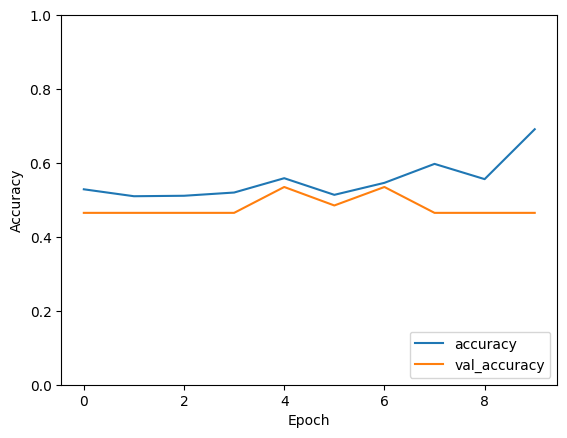

7/7 [==============================] - 0s 27ms/step - loss: 0.7010 - accuracy: 0.4650

 Test accuracy: 0.4650000035762787


In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function for converting image to the required input shape for the deep-learning model
def preprocess_image_for_model(image):
    # Resize the image to the input shape of the model
    return cv2.resize(image, (64, 64))

# Function to create a custom deep-learning model
def create_deep_learning_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train the deep-learning model and capture training history
def train_deep_learning_model(model, X_train, y_train, X_val, y_val, epochs=10):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
    return history

# Function to plot the validation graph
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

# Function to evaluate the deep-learning model
def evaluate_model(model, X_val, y_val):
    test_loss, test_accuracy = model.evaluate(X_val, y_val)
    print(f'\n Test accuracy: {test_accuracy}')

if __name__ == "__main__":
    # Generate synthetic data for demonstration
    num_samples = 1000
    input_shape = (64, 64, 3)
    num_classes = 2

    X = np.random.rand(num_samples, *input_shape)
    y = np.random.randint(0, num_classes, size=num_samples)

    # Split the data into training and validation sets
    split_ratio = 0.8
    split_idx = int(num_samples * split_ratio)
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    # Create and train the deep-learning model
    model = create_deep_learning_model(input_shape, num_classes)
    history = train_deep_learning_model(model, X_train, y_train, X_val, y_val)

    # Plot the validation graph
    plot_training_history(history)

    # Evaluate the model
    evaluate_model(model, X_val, y_val)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []

    posture_classes = ["Bent Over", "Almost Lied Down", "Standing Straight", "Not Straight"]

    for posture_class in posture_classes:
        class_folder = os.path.join(folder_path, posture_class)
        if not os.path.exists(class_folder):
            continue

        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                image = cv2.resize(image, (224, 224))  # Resize to a common size
                images.append(image)
                labels.append(posture_class)

    return np.array(images), np.array(labels)

# Load and preprocess the dataset
dataset_folder = "./Result"  # Replace with the path to your labeled dataset
X, y = load_images(dataset_folder)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")
